## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext lab_black
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

## Data Overview



In [2]:
df = pd.read_csv("used_phone_data.csv")  # retrieving data for viewing
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07


Data has 3571 rows and 15 columns

In [3]:
df.columns  # Finding all the column names

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [4]:
df.info()  # checking data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [5]:
No_of_brands = df["brand_name"].nunique()  # Finding the number of used phone brands
print(f"The are {No_of_brands} used phone brands")

The are 34 used phone brands


In [6]:
df.isnull().sum()  # Finding missing date in each column

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [7]:
df.duplicated(keep="first").value_counts()  # Finding duplicated in data

False    3571
dtype: int64

No duplicates observed

In [8]:
df.describe()  # Data statistics with missing values present

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


In [9]:
df = df.fillna(df.median())  # Replacing missing values with median
df.describe()  # Data statistics after replacing missing values with median

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.329863,6.546486,54.469509,4.056802,3067.112714,179.384248,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.705341,6.877529,84.585924,1.389897,1363.062572,90.196828,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


There are no significant differences between the statistics of the original data (with missing values), and the statistic after replacing missing values with the median.

## EDA

In [29]:
x = df.groupby("brand_name")["ram"].mean().sort_values(ascending=False)
x

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.641326
Honor         4.593220
Xiaomi        4.567164
Google        4.533333
Meizu         4.451613
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Asus          4.047619
ZTE           4.023050
HTC           4.000000
Panasonic     4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Coolpad       3.954545
Motorola      3.945455
Gionee        3.933036
Acer          3.901961
LG            3.893868
Lenovo        3.886628
BlackBerry    3.829545
Others        3.751041
Micromax      3.750000
Spice         3.750000
Nokia         3.634298
Alcatel       3.426000
Karbonn       3.375000
Lava          3.277778
Infinix       2.600000
Celkon        1.466216
Name: ram, dtype: float64

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

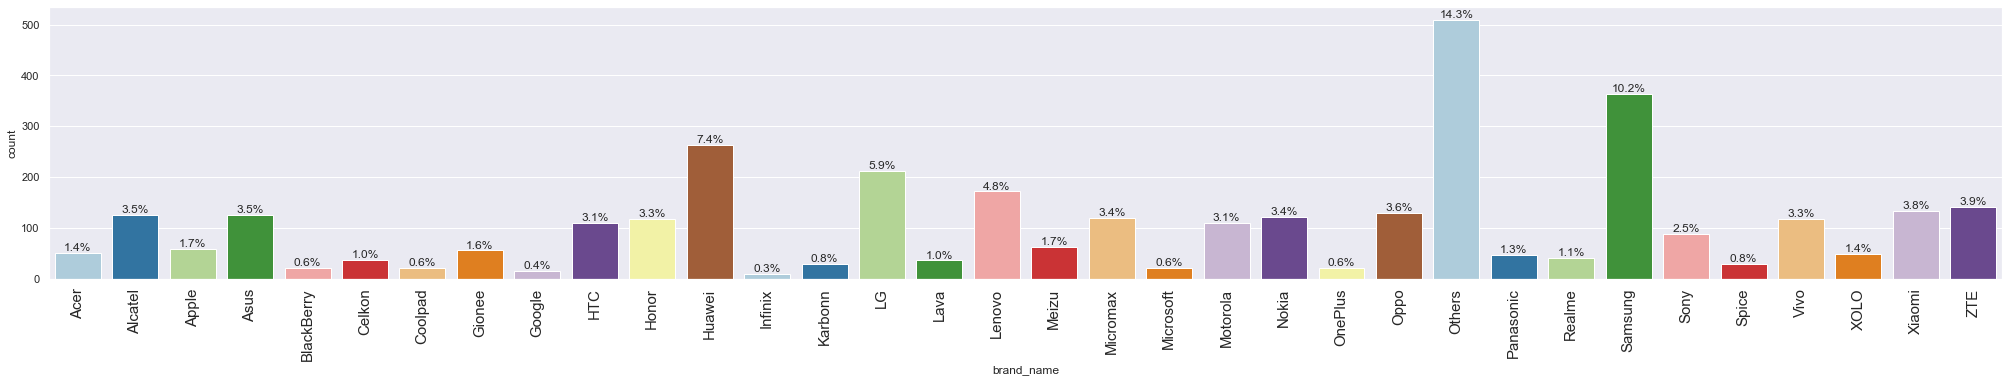

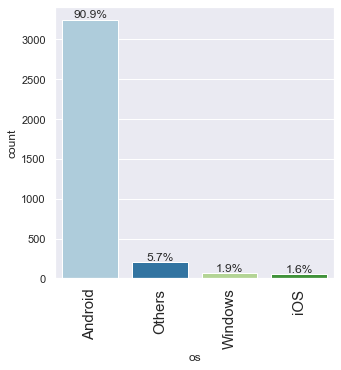

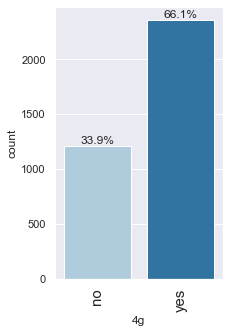

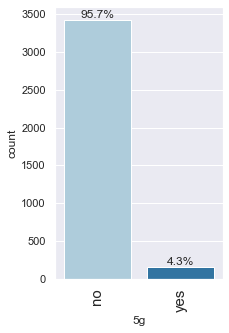

In [12]:
# Plotting the distribution of object columns
ax1 = labeled_barplot(df, "brand_name", perc=True)
plt.show()
ax2 = labeled_barplot(df, "os", perc=True)
plt.show()
ax3 = labeled_barplot(df, "4g", perc=True)
plt.show()
ax4 = labeled_barplot(df, "5g", perc=True)
plt.show()

There are 33 brand names listed, plus others 
Others make up 14.3% of the phones, followed by Samsung 10.2% and Huawei 7.4%. The leaat popular phone is Infinix 0.3%

90.9% of the used phone market is dominated by androids' Windows account for 1.9%, IOS 1.6% and others 5.7%

61.1% of used phone users use 4g

4.3% of used phone users use 5g

## Histplot of all numerical columns

In [13]:
df1 = df.drop(
    ["brand_name", "os", "4g", "5g"], axis=1  # Dropping the object columns
)  # Removing the brand_name column

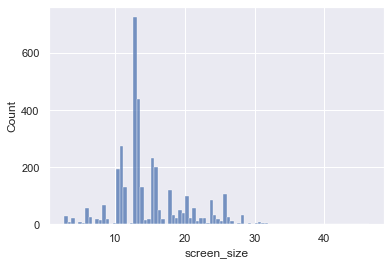

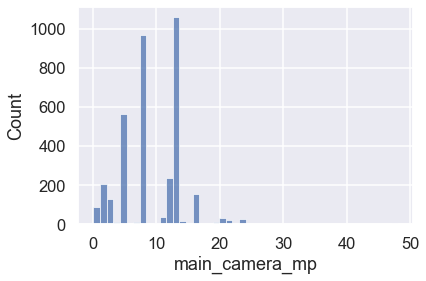

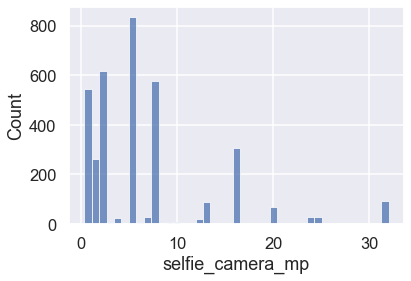

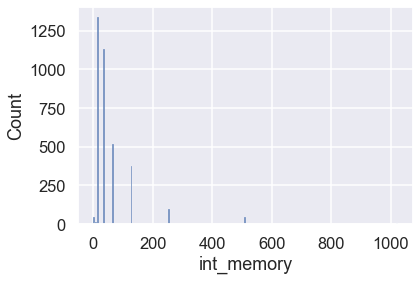

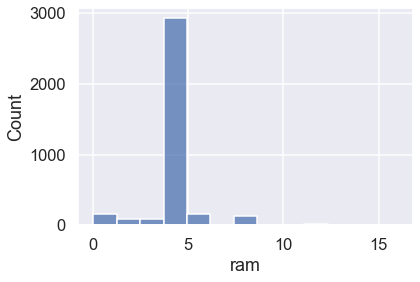

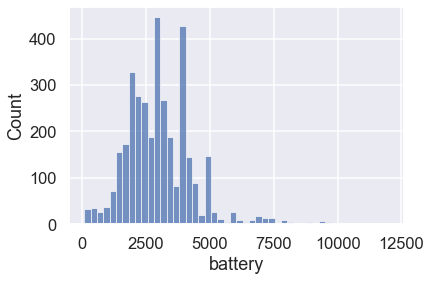

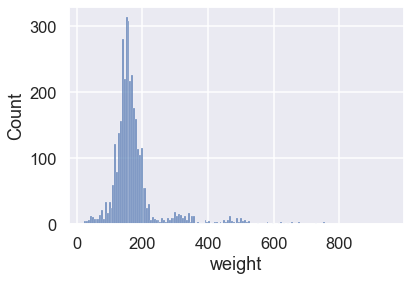

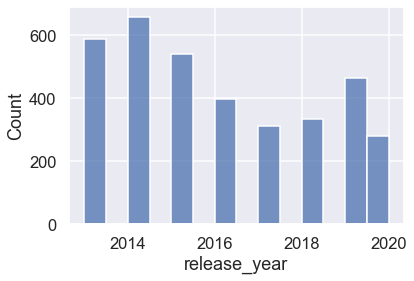

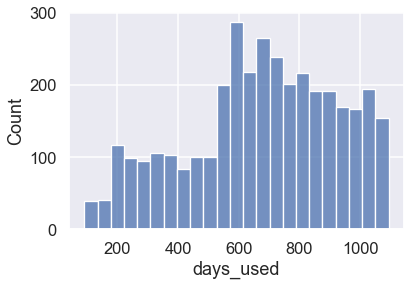

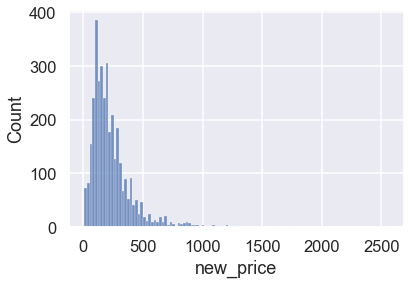

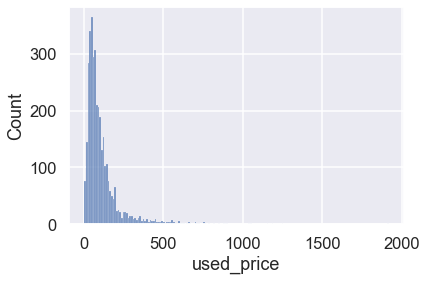

In [14]:
for i in df1.columns:  # Ploting the distribution of all the numerical columns
    # plt.figure(figsize=(10, 4))
    sns.histplot(data=df1, x=i)
    sns.set_context("talk")
    plt.show()

Most of the numberical distribution or skewed.

The weight distribution is close to normal, but with outliers

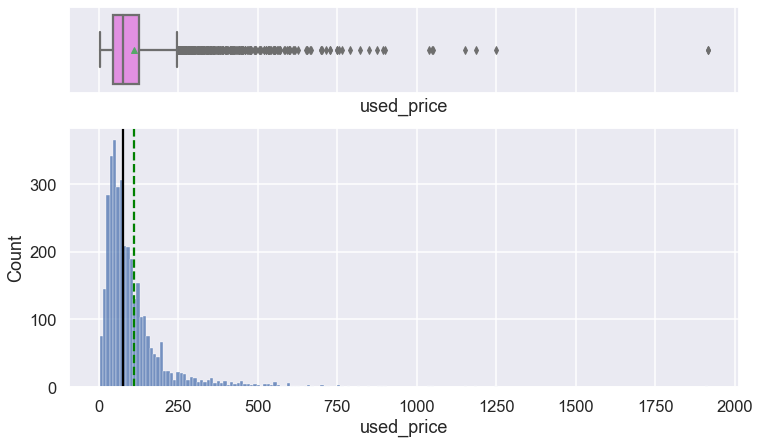

In [15]:
# Distribution of used phone price
histogram_boxplot(df, "used_price")

<AxesSubplot:>

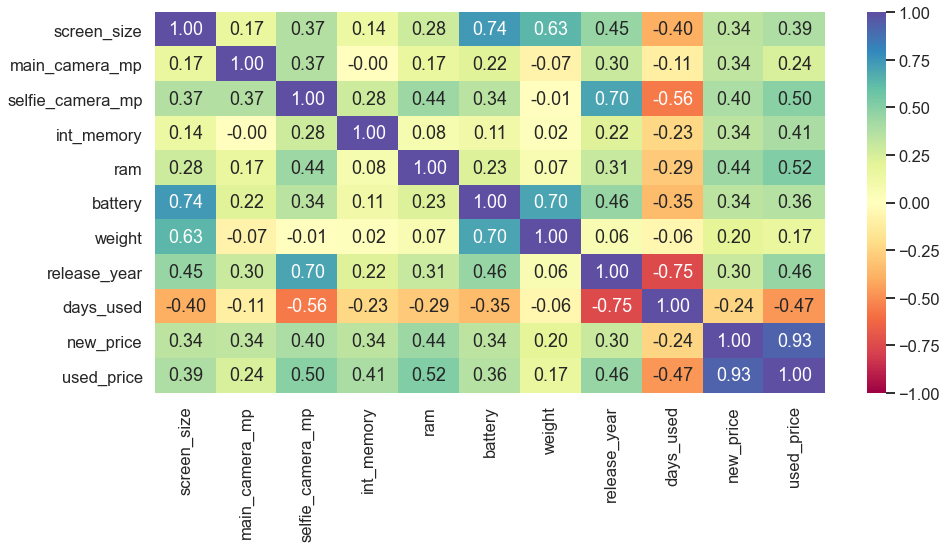

In [16]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
# Finding the correlation of between attributes

The used_price of the phone is highly correlated to the following attributes: new_price: (0.9), ram: (0.52), selfi_camera_mp:(0.5) and int memorty (0.47)

but negatively correlated to the days_used (0.47)


<AxesSubplot:xlabel='brand_name', ylabel='ram'>

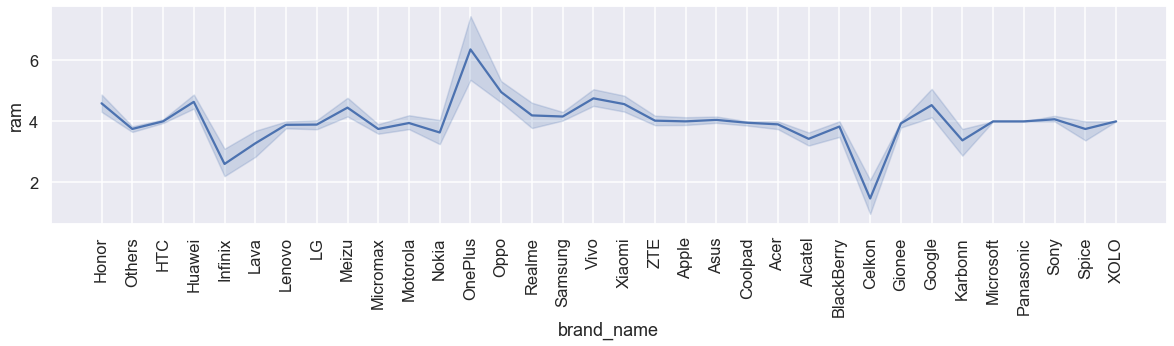

In [17]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.lineplot(data=df, x="brand_name", y="ram")

In [18]:
df.groupby("brand_name")["ram"].mean().sort_values(ascending=False)

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.641326
Honor         4.593220
Xiaomi        4.567164
Google        4.533333
Meizu         4.451613
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Asus          4.047619
ZTE           4.023050
HTC           4.000000
Panasonic     4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Coolpad       3.954545
Motorola      3.945455
Gionee        3.933036
Acer          3.901961
LG            3.893868
Lenovo        3.886628
BlackBerry    3.829545
Others        3.751041
Micromax      3.750000
Spice         3.750000
Nokia         3.634298
Alcatel       3.426000
Karbonn       3.375000
Lava          3.277778
Infinix       2.600000
Celkon        1.466216
Name: ram, dtype: float64

OnePlus has the highest average ram (6.36) and celkon has the lowest ram (1.46).

In [19]:
df_large_batteries = df[df["battery"] > 4500]
# Culling data for phone with battries with energy capacity greater than 4500 mAh
df_large_batteries

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
11,Honor,Android,15.72,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,117.9400,74.60
20,Honor,Android,25.56,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,248.9000,167.63
21,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,201.1400,131.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,Samsung,Android,16.67,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,890.8000,667.92
3537,Samsung,Android,16.67,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,1054.4505,789.54
3550,Samsung,Android,15.88,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,165.6650,82.79
3565,Asus,Android,24.61,yes,no,8.0,24.0,128.0,8.0,6000.0,240.0,2019,325,1163.6500,756.99


There are 346 of such phones

<AxesSubplot:xlabel='battery', ylabel='weight'>

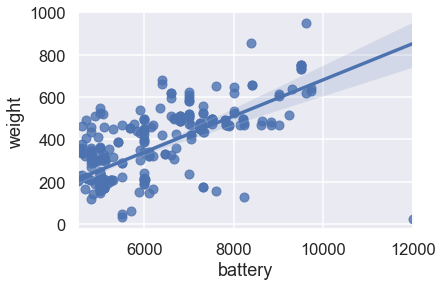

In [20]:
# Regression blot of battery size(>4500 ) vs weight of phone
sns.regplot(data=df_large_batteries, x="battery", y="weight")

 Weight of batteries with energy capacity greater than 4500 mAh is positively correlated to the weight of the phones 

<AxesSubplot:xlabel='days_used', ylabel='used_price'>

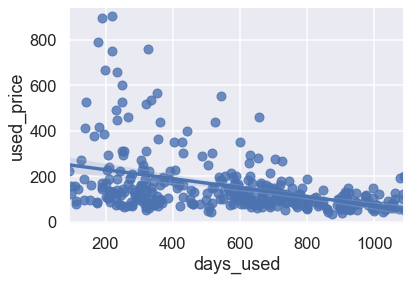

In [21]:
# Reg days used against used price
sns.regplot(data=df_large_batteries, x="days_used", y="used_price")

In [22]:
# The used price is negatively correlated to the number of days_used

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='days_used'>

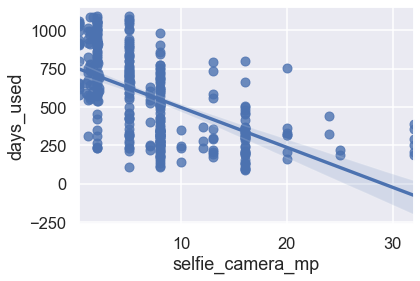

In [23]:
# Regression of selfie_camera_mp against days_used
sns.regplot(data=df_large_batteries, x="selfie_camera_mp", y="days_used")

The selfie_camera_mps are bigger for newer used_phones.

In [24]:
# Culling data for phoen with screen size greater than 6 inches
df_size = df[df["screen_size"] > 6]
df_size

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07


In [25]:
# Phones across different brands with screen size greater than 6
df_size.brand_name.value_counts()

Others        486
Samsung       342
Huawei        257
LG            204
Lenovo        172
ZTE           140
Xiaomi        134
Oppo          129
Asus          126
Alcatel       118
Honor         118
Vivo          117
Micromax      116
HTC           110
Motorola      110
Nokia          86
Sony           86
Meizu          62
Gionee         56
Apple          53
Acer           51
XOLO           49
Panasonic      47
Realme         41
Lava           36
Celkon         31
Spice          30
Karbonn        30
Microsoft      22
BlackBerry     22
OnePlus        22
Coolpad        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

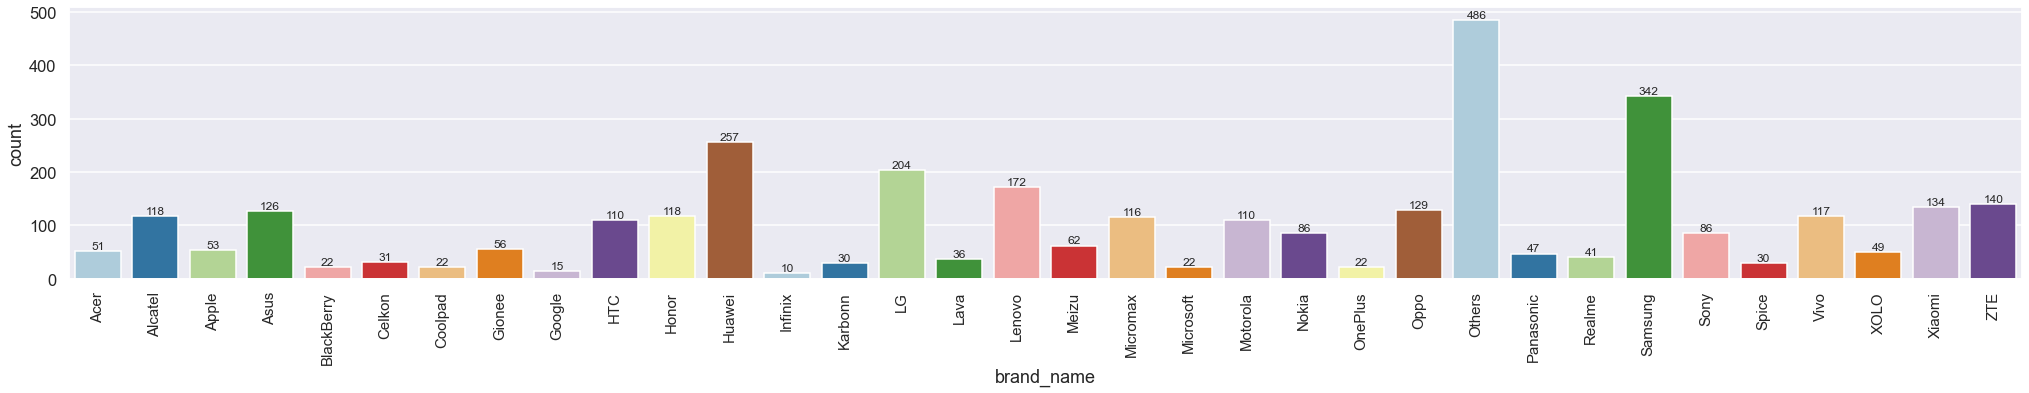

In [26]:
labeled_barplot(df_size, "brand_name")

Off the brands with screen size greater than 6, Samsung is the most popular brand 342 phones, followed by Huawei(257) and LG (204)

**Distribution of budget phones offering greater than 8MP selfie cameras across brands**

In [27]:
df_greaterthan8 = df[
    df["selfie_camera_mp"] > 8
]  # data for used_phones with cameras greater than 8MP

In [28]:
y = df_greaterthan8.groupby("brand_name")["selfie_camera_mp"].mean()
y.sort_values(ascending=False)

brand_name
Oppo          22.120000
Honor         20.802326
Huawei        20.670330
Lenovo        20.142857
Xiaomi        19.338462
Nokia         18.900000
Motorola      18.692308
Vivo          18.564103
Meizu         18.541667
Samsung       18.183333
Realme        17.166667
Others        16.450000
Gionee        16.250000
Infinix       16.000000
OnePlus       16.000000
BlackBerry    16.000000
LG            15.937500
ZTE           15.450000
Asus          15.333333
Panasonic     14.500000
HTC           14.100000
Coolpad       14.000000
Sony          13.428571
Acer          13.000000
Micromax      13.000000
Name: selfie_camera_mp, dtype: float64

<AxesSubplot:xlabel='brand_name', ylabel='selfie_camera_mp'>

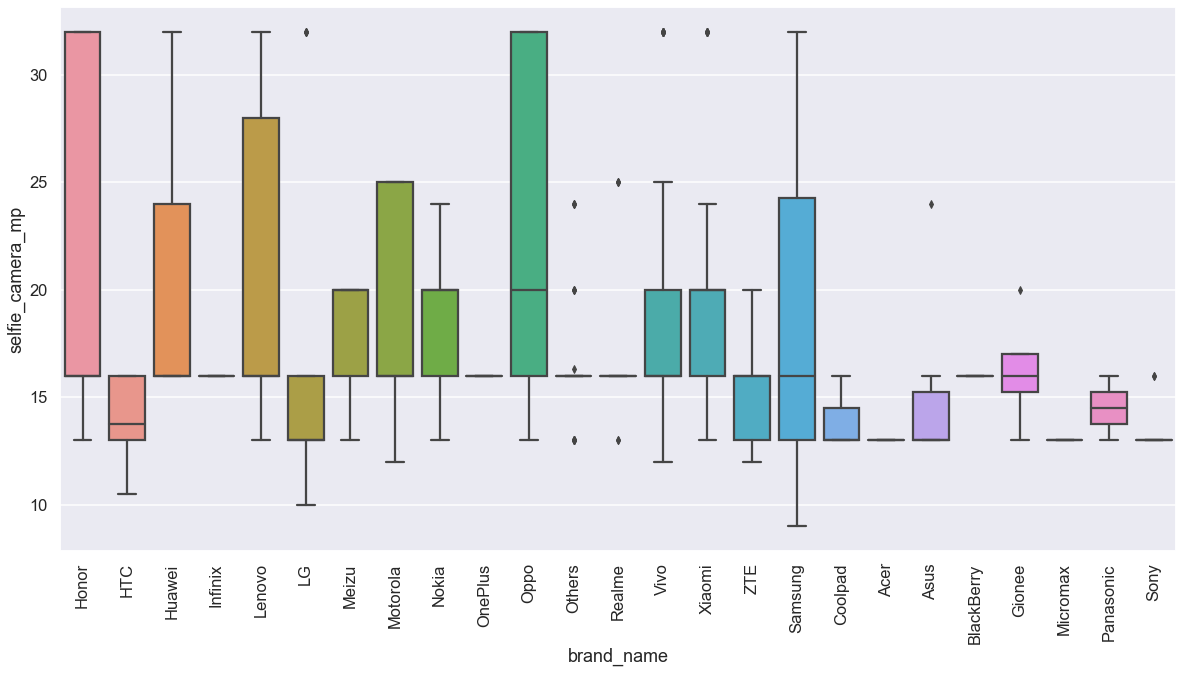

In [29]:
# Barplot of the distribution of budget phones offering greater than 8MP selfie cameras across brands
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.boxplot(data=df_greaterthan8, x="brand_name", y="selfie_camera_mp")

**Some insights on the distribution**

Oppo has the the highest average selfie_camera_mp and it's also right skewed. 

Only Panasonic has a uniform distribution of selfie_camera_mp

Samsung is right-skewed
Huawei is right-skewed with outliers

Let's convert the object type columns to category type

## Data Preprocessing
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [30]:
# Convert object types to category
df["brand_name"] = df["brand_name"].astype("category")
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

In [31]:
df1.info()  # Rechecking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   screen_size       3571 non-null   float64
 1   main_camera_mp    3571 non-null   float64
 2   selfie_camera_mp  3571 non-null   float64
 3   int_memory        3571 non-null   float64
 4   ram               3571 non-null   float64
 5   battery           3571 non-null   float64
 6   weight            3571 non-null   float64
 7   release_year      3571 non-null   int64  
 8   days_used         3571 non-null   int64  
 9   new_price         3571 non-null   float64
 10  used_price        3571 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 307.0 KB


df1 Has only float64 and int64 data type.

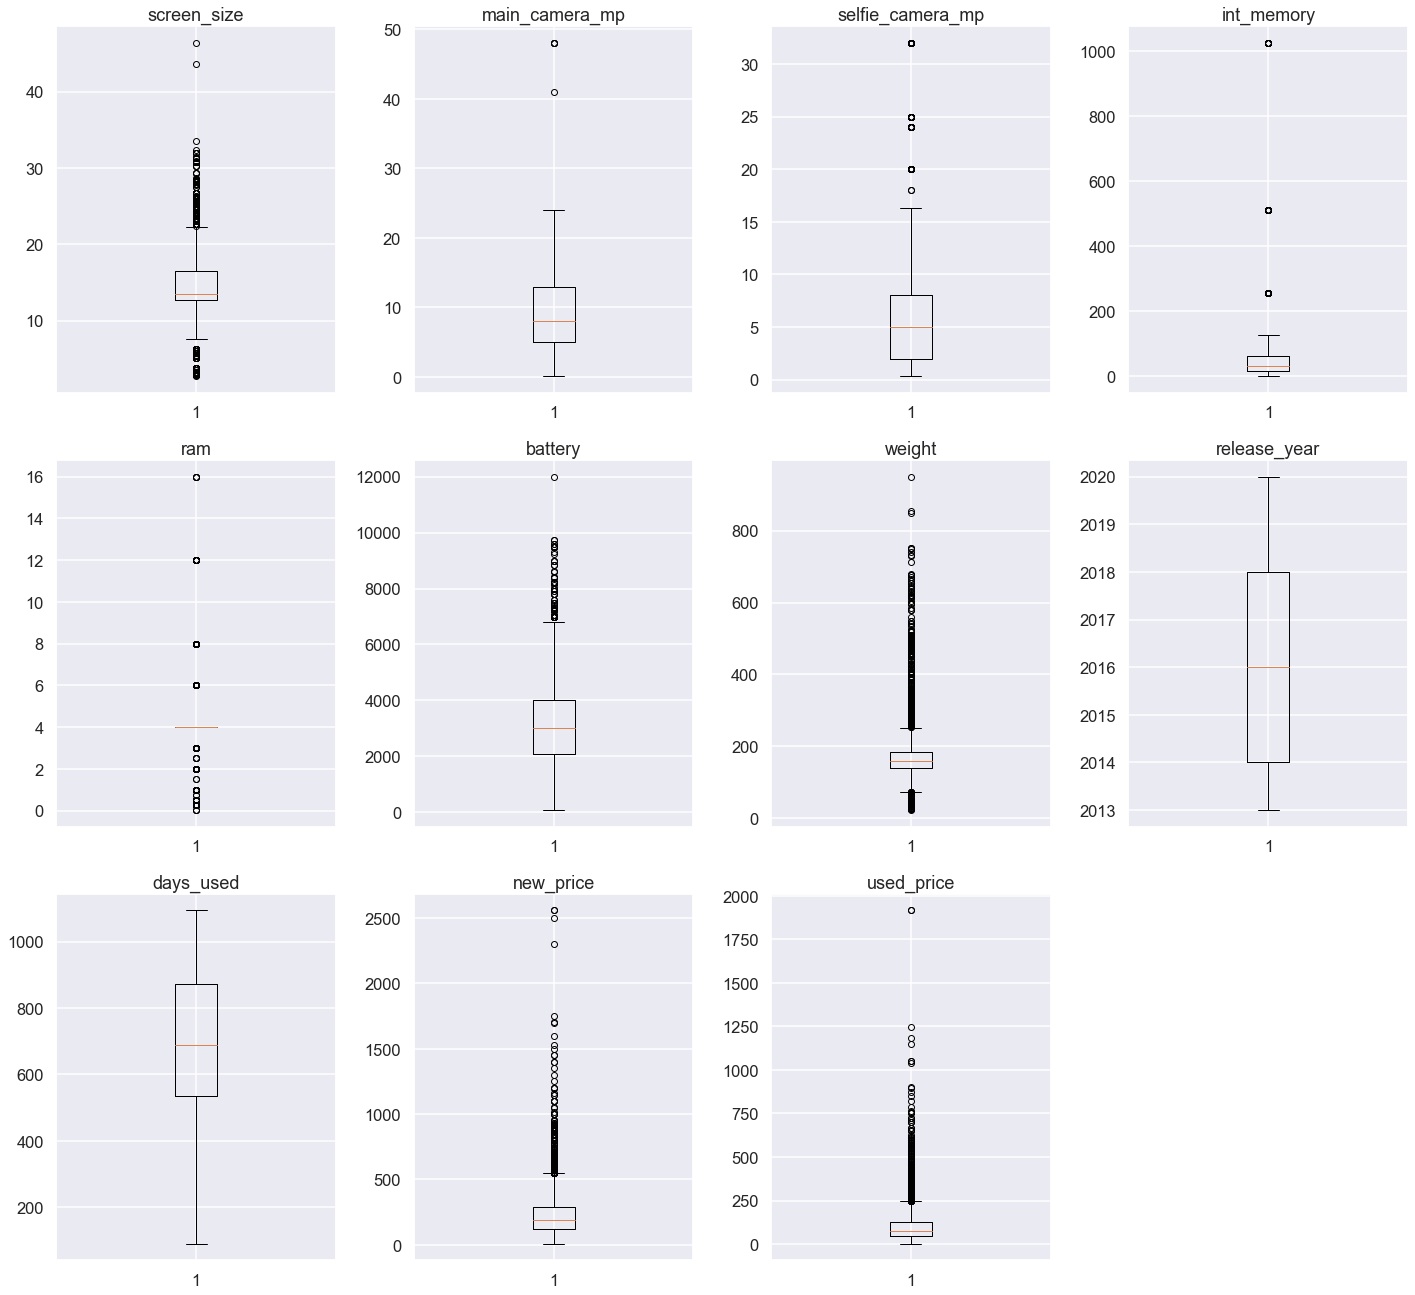

In [32]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(df1):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Treating outliers**

In [33]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df1[col].quantile(0.25)  # 25th quantile
    Q3 = df1[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [34]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

In [35]:
# treating the outliers
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
df2 = treat_outliers_all(df, num_cols)

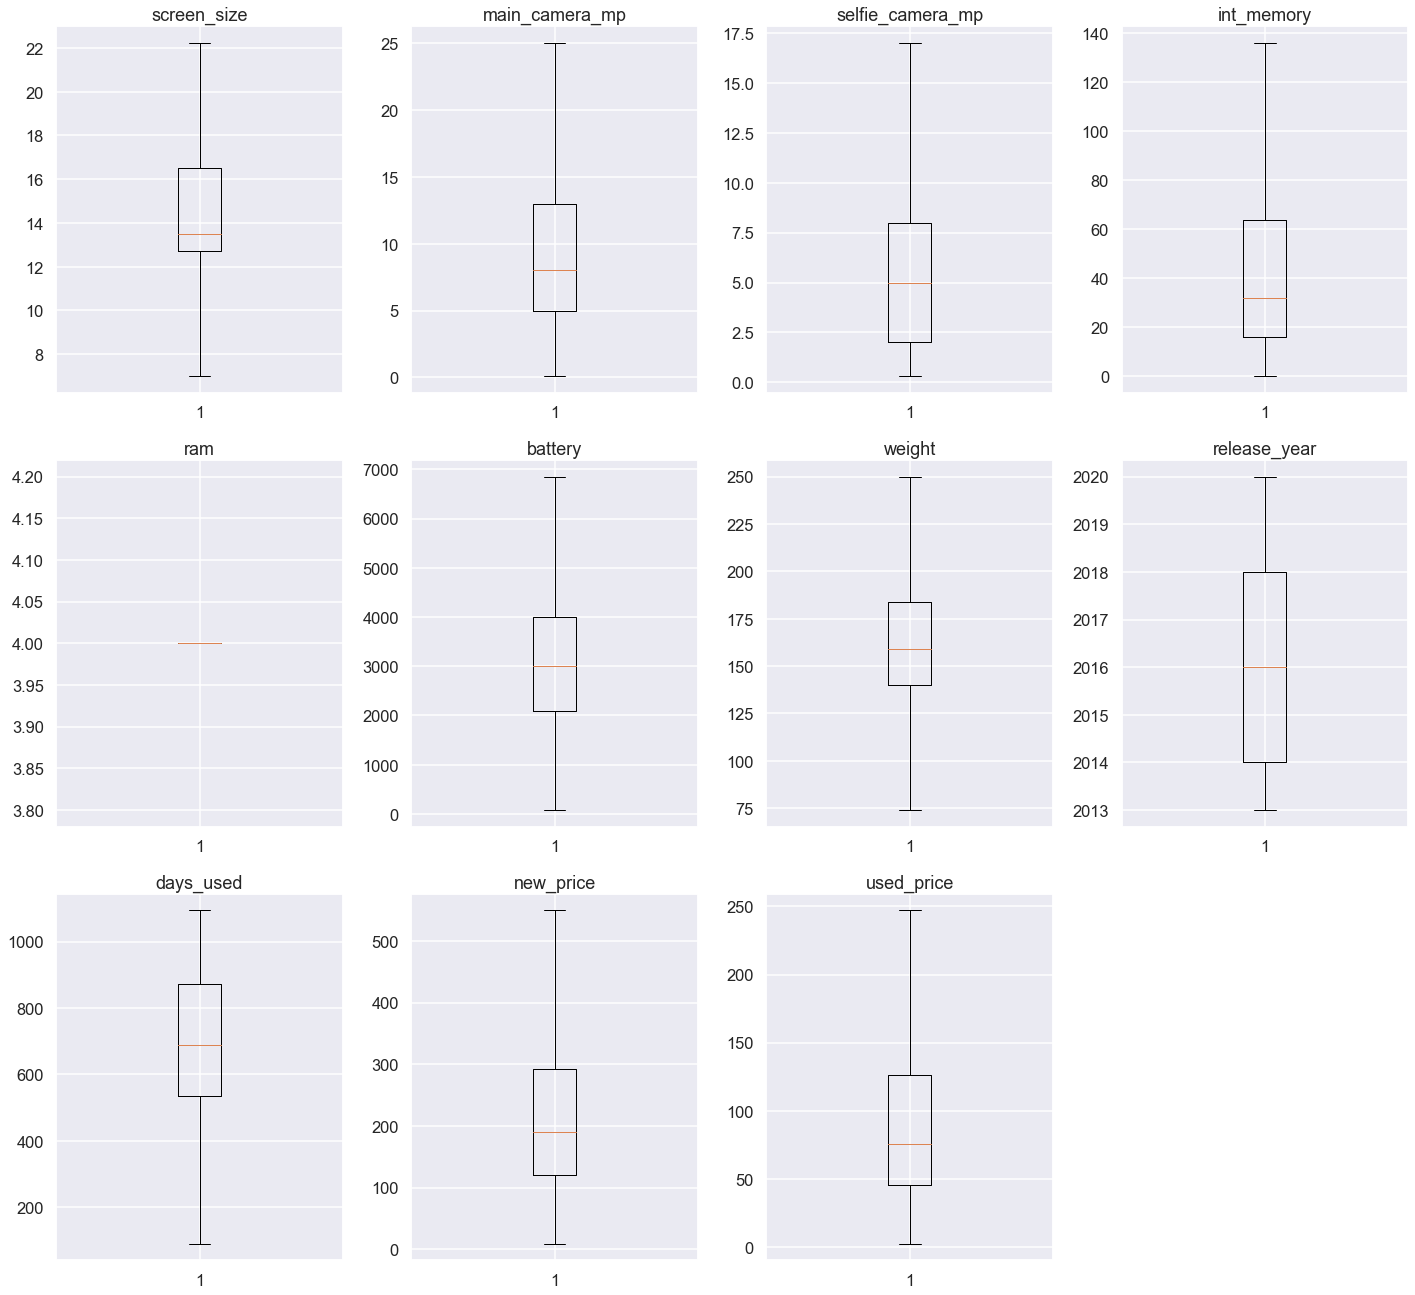

In [36]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

<AxesSubplot:>

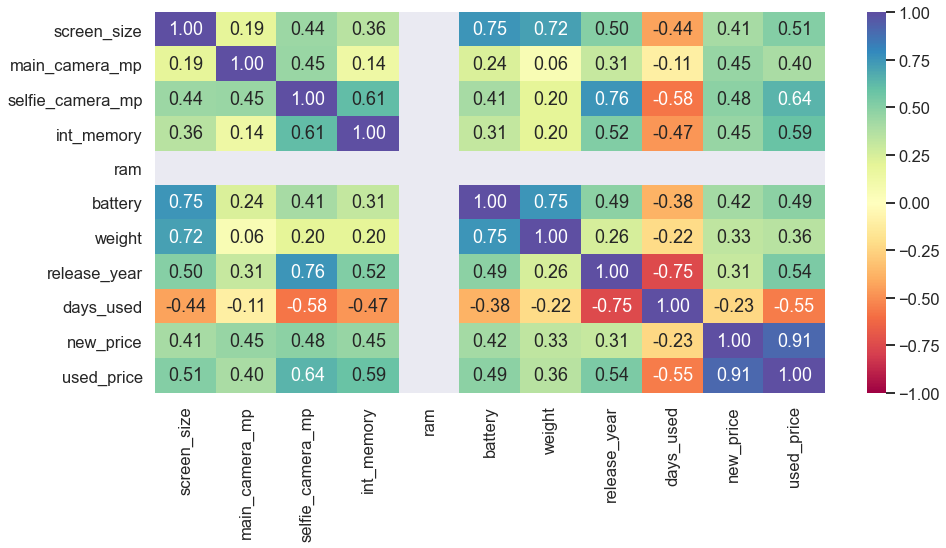

In [37]:
# Finding the correlation of between attributes
plt.figure(figsize=(15, 7))
sns.heatmap(
    df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)

The used_price of the phone is highly correlated to the following attributes: new_price: (0.91), selfie_camera_mp (0.64), release_year (0.54), int_memeory(0.59)ram: (0.52), selfi_camera_mp:(0.5) and int memorty (0.47)

but negatively correlated to the days_used (0.55)

The correlations are stronger after the outlier treatment

## Building a Linear Regression model

In [38]:
# defining X and y variables
X = df.drop("used_price", axis=1)
y = df["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       22.225  yes   no            13.0   
1      Honor  Android       22.225  yes  yes            13.0   
2      Honor  Android       22.225  yes  yes            13.0   
3      Honor  Android       22.225  yes  yes            13.0   
4      Honor  Android       15.720  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  4.0   3020.0   146.0          2020   
1              16.0       128.0  4.0   4300.0   213.0          2020   
2               8.0       128.0  4.0   4200.0   213.0          2020   
3               8.0        64.0  4.0   6850.0   250.0          2020   
4               8.0        64.0  4.0   5000.0   185.0          2020   

   days_used  new_price  
0        127     111.62  
1        325     249.39  
2        162     359.47  
3        345     278.93  
4        293     140.87  
0     86.9600
1    161.4900
2   

In [39]:
# One-hot encoding
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,22.225,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,111.62,...,0,0,0,0,0,0,0,0,1,0
1,22.225,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,249.39,...,0,0,0,0,0,0,0,0,1,1
2,22.225,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,359.47,...,0,0,0,0,0,0,0,0,1,1
3,22.225,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345,278.93,...,0,0,0,0,0,0,0,0,1,1
4,15.720,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,140.87,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [41]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


## Model performance evaluation

In [42]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

**coefficients and intercept of the model**

In [43]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,2.076879e-01
main_camera_mp,-2.742636e-01
selfie_camera_mp,8.380688e-01
int_memory,8.588868e-02
ram,4.760969e-12
battery,1.355481e-04
weight,-1.226033e-02
release_year,-2.459011e-01
days_used,-8.460932e-02
new_price,3.844636e-01


**Model Performance**

In [44]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [45]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.960441,10.222224,0.955136,0.954257,18.489055


In [46]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.74532,10.171443,0.957443,0.955446,16.417574


**Observations**

The training  𝑅2  is 95.5%, indicating that the model explains 95.5% of the variation in the train data. So, the model is not underfitting.

MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

MAE indicates that our current model is able to predict used_price of phones within a mean error of 10.17 years on the test data.

MAPE on the test set suggests we can predict within 16.4% of the used_price of phone.

## Linear Regression using Statsmodel

In [47]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1110.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:32:38   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.036e+04
Df Residuals:                    2451   BIC:                         2.064e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.20

Observations

Negative values of the coefficient show that used_price decreases with the increase of corresponding attribute value.

Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

But these variables might contain multicollinearity, which will affect the p-values.

So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

**Checking Multicollinearity**

In [48]:
from statsmodels.stats.outliers_influence import (
    variance_inflation_factor,
)  # Import library for check the variance inflaction factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [49]:
checking_vif(x_train1)

,feature,VIF
0,screen_size,3.529005e+00
1,main_camera_mp,2.227816e+00
2,selfie_camera_mp,3.860192e+00
3,int_memory,2.187474e+00
4,ram,3.846732e+06
5,battery,3.730602e+00
6,weight,3.202294e+00
7,release_year,5.000190e+00
8,days_used,2.631834e+00
9,new_price,2.714314e+00


VIF for brand_name_Huawei, brand_name_LG, and brand_name_Samsung are slightly greater than 5 but less than 10, which implies they are correlated with each other. Multicollinearity or correlation of predictor variables is not desirable for a good model.

**Treating multicollinearity**

In [50]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [51]:
col_list = ["brand_name_Huawei", "brand_name_LG", "brand_name_Samsung"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.954293,14.093737
1,brand_name_Huawei,0.954292,14.093960
2,brand_name_LG,0.954287,14.094737


brand_name_LG made the least change in the adjusted R-squared

In [52]:
col_to_drop = "brand_name_LG"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_LG


,feature,VIF
0,screen_size,3.524288e+00
1,main_camera_mp,2.225329e+00
2,selfie_camera_mp,3.860180e+00
3,int_memory,2.187463e+00
4,ram,3.846084e+06
5,battery,3.729680e+00
6,weight,3.198368e+00
7,release_year,4.998706e+00
8,days_used,2.631834e+00
9,new_price,2.711397e+00


Dropping brand_name_LG has brought the VIF for "brand_name_LG", "brand_name_Samsung" under 5

No multicollinearity

In [53]:
# Let's check the model performance
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1135.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:32:38   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.036e+04
Df Residuals:                    2452   BIC:                         2.064e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.20

The adj. R-squared is still the same, 0.954, which shows that the dropped columns did not have an effect on the model
As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.
All attributes with p-value > 0.05 are not significant, so need to be dropped/
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.


In [54]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'days_used', 'new_price', 'brand_name_Apple', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Infinix', 'brand_name_Nokia', 'brand_name_OnePlus', 'os_Others', '4g_yes']


In [55]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [56]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4016.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:32:39   Log-Likelihood:                -10150.
No. Observations:                2499   AIC:                         2.033e+04
Df Residuals:                    2485   BIC:                         2.041e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
main_camera_mp        -0.2818      0

Now no feature has p-value greater than 0.05

We'll consider the features in x_train3 as the final ones and olsmod2 as final model.

In [57]:
# let us create a dataframe with actual, fitted and residual values**

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,100.48,99.945686,0.534314
1539,111.68,117.259896,-5.579896
3452,113.89,112.268446,1.621554
1727,64.09,70.591034,-6.501034
1926,67.95,68.430949,-0.480949


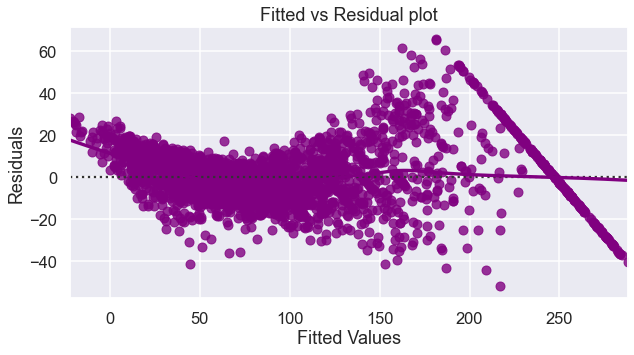

In [58]:
# let's plot the fitted values vs residuals

plt.figure(figsize=(10, 5))
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

No pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.



## Test for Normality

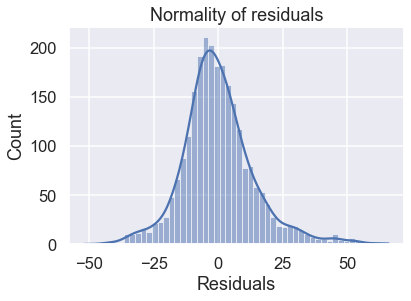

In [59]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals does have a bell shape.
Let's check the Q-Q plot.

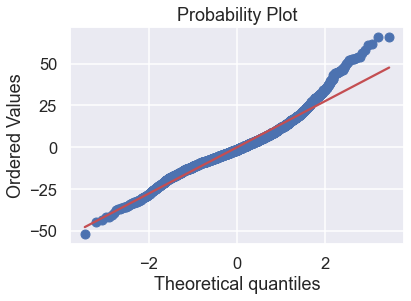

In [60]:
# Let's check the Q-Q plot.
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the head.

In [61]:
# Checking Shapiro's model
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9610336422920227, pvalue=2.135094194735291e-25)

Since p-value > 0.05, the residuals are normal or can be accepted as close to normal as per the Shapiro-Wilk test.


## TEST FOR HOMOSCEDASTICITY

In [62]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0487773629610773), ('p-value', 0.20135126405844322)]

p > 0.05 The residuals are hemoscedastic. 

**All the assumptions of linear regression have been satisfied**

In [63]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,23.079415
278,195.6700,188.682824
26,247.1925,224.762738
2910,89.9700,91.279577
2631,69.2000,63.993617
1582,89.5800,108.524466
2110,247.1925,263.744572
3160,65.3400,65.515000
2817,115.7700,106.128341
549,39.2900,48.311867


The actual and predicted values are comparable. Good prediction by the model.

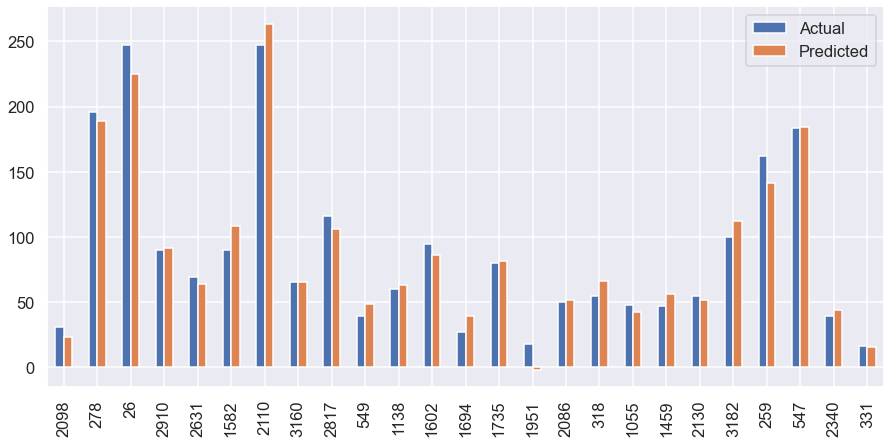

In [64]:
# Bar plot of the actual and predicted
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [65]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.04901,10.278116,0.954564,0.954308,18.665149


In [66]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.722107,10.109717,0.957586,0.957025,16.300215


The model is able to explain ~95% of the variation in the data, which is very good.

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

The MAPE on the test set suggests we can predict within 18.7% of the life expectancy.

Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

In [67]:
# Comparing initial model created with sklearn with final model
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_test_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.960441,13.722107
MAE,10.222224,10.109717
R-squared,0.955136,0.957586
Adj. R-squared,0.954257,0.957025
MAPE,18.489055,16.300215


In [68]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.745320,13.722107
MAE,10.171443,10.109717
R-squared,0.957443,0.957586
Adj. R-squared,0.955446,0.957025
MAPE,16.417574,16.300215


The performance of the two very similar to each other in both the training and data set.

In [69]:
## Final Model Summary
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4016.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:32:41   Log-Likelihood:                -10150.
No. Observations:                2499   AIC:                         2.033e+04
Df Residuals:                    2485   BIC:                         2.041e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
main_camera_mp        -0.2818      0

## Actionable Insights and Recommendations

**Factors that negatively influence price of used phone, from the most impartful to the least:**

-main_camera_mp ,days_used, 4g

-the following brand_names, from the hightest to the least

OnePlus, Infinix, Nokia, Gionee, and others(brands not listed) 

**Factors that positively influence price of used_phones:**

-ram, selfie_camera_mp, new_price and int_memory

-The brand of phones that positively influence prices from most to least:
Google, Apple

-It is important that the company deals more in Google and Apple phones to maximize revenue, and also phones with higher ram

